En desarrollo.

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">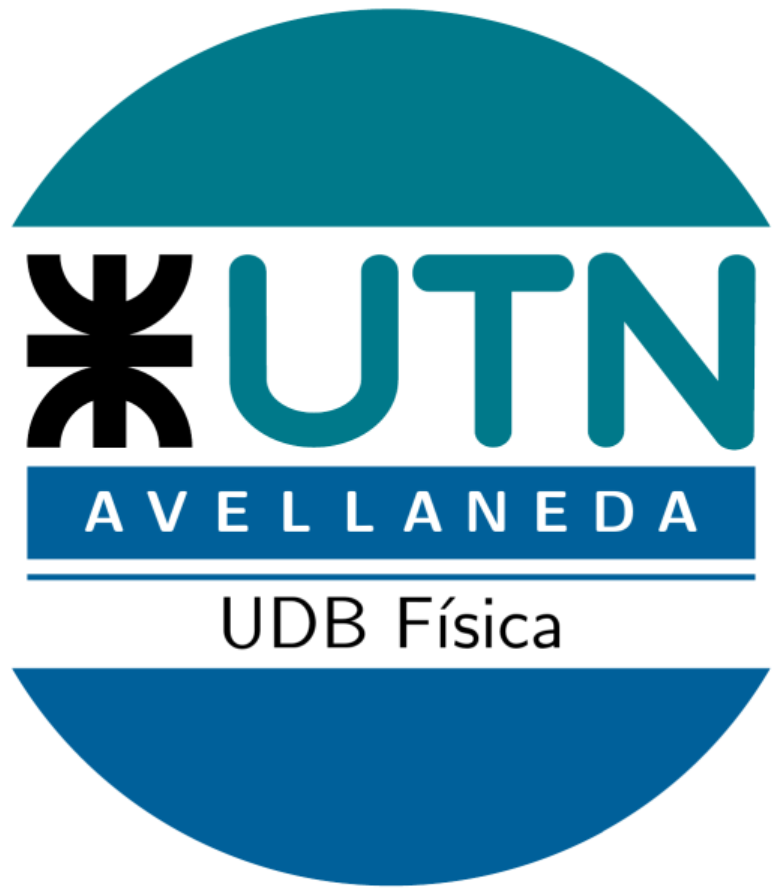</a></td><td style="border:none;"><font face="times" size=4>Física 2<br>2025<br>Electromagnetismo<br>Material de referencia</font></td></tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">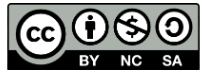</a></td><td style="border:none;"><font face="times" size=4>2025 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font></td></tr>
</table>

# Campo y potencial electrostático en presencia de conductores

---

Principales características:

- El campo electrostático dentro de un material conductor es nulo.
- El campo eléctrico es perpendicular a la superficie de un conductor.
- El módulo del campo eléctrico cerca de la superficie de un conductor es $E = \frac{\sigma}{\varepsilon_0}$.
- La carga se distribuye en la superficie del conductor (solo hay densidad superficial de carga, no hay carga en volumen).
- Las superficies de los conductores son superficies equipotenciales (todo el conductor se encuentra a un mismo potencial eléctrico).

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Segmento conductor](#toc1_)    
- 2. [Placa conductora](#toc2_)    
- 3. [Referencias](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from scipy import integrate
from numpy import sqrt, cos, sin, pi
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
# %precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import plotEf, equipotencialesPuntuales

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
%matplotlib widget

Looking in indexes: https://test.pypi.org/simple/


## 1. <a id='toc1_'></a>[Segmento conductor](#toc0_)

Segmento conductor de longitud $L$, centrado en $x=0$, mantenido a un potencial $V = 1\,\text{V}$. 

In [3]:
def Zmn(row, m, a, delta):
    xm = delta/2 + (m-1) * delta  # El centro del segmento.
    xa = (row - 1) * delta
    xb = row * delta
    num = np.sqrt(a * a + (xa - xm) * (xa - xm)) - (xa - xm)
    den = np.sqrt(a * a + (xb - xm) * (xb - xm)) - (xb - xm)
    
    return np.log(num/den)

In [19]:
# Potencial:
b = 1
# Largo:
L = 1

N = 100
a = 0.01
delta = L/N

row = np.array(np.arange(1,N+1))
Z = np.array([]).reshape(0,N)
for m in np.arange(1,N+1):
    Z = np.concatenate([Z, Zmn(row, m, a, delta).reshape(1,N)], axis=0)

B = np.ones(N)*b
q = np.linalg.solve(Z, B)

# Check that the solution is correct:
np.allclose(np.dot(Z, q), B)

True

In [20]:
# El resultado es kQ, entonces:
q = q / 9E9

# Se arma la lista de cargas del hilo:
x = (-L/2 + delta * (-0.5 + row)).reshape(1,N)
y = np.zeros(N).reshape(1,N)
z = np.zeros(N).reshape(1,N)
Q = np.concatenate([q.reshape(1,N),x,y,z], axis=0)
Q = np.transpose(Q)


In [24]:
Nx = 200
Ny = 200
x = np.linspace(-0.6,0.6,Nx)        # x variables in 1D
y = np.linspace(-0.2,0.2,Ny)        # y variable in 1D
X,Y = np.meshgrid(x,y)          # 2D meshgrid

In [25]:
def Efield2D(x, y, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1],
        [q2,x2,y2],
        ...
        [qN,xN,yN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    Ei,Ej= 0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2)**(3/2)
        Ei = Ei + k * qi[0] * (x - qi[1]) / r
        Ej = Ej + k * qi[0] * (y - qi[2]) / r

    return Ei, Ej

def region_conductor(x,y):
    regionx = np.piecewise(X, [(X > -0.5) & (X < 0.5), ], [0, 1])
    regiony = np.piecewise(Y, [(Y > -0.01) & (Y < 0.01), ], [0, 1])
    region = regionx + regiony
    region = np.piecewise(region, [region > 0], [1, 0])

    return region

# Defining custom plotting functions
def my_contourf(x,y,F,ttl,clrmp = 'inferno'):
    cnt = py.contourf(x,y,F,41,cmap = clrmp)
    
    # Antialiasing block for exporting figure to pdf later
    for c in cnt.collections:
        c.set_edgecolor("face")
    
    cbar = py.colorbar()
    # py.xlabel(r'$x$',fontsize=26); py.ylabel(r'$y$',fontsize=26); 
    py.xlabel(r'$x$'); py.ylabel(r'$y$'); 
    # py.title(ttl)
    # cbar.set_label(ttl,fontsize=26)
    cbar.set_label(ttl)
    # py.xlim([x[0],x[-1]])
    # py.ylim([y[0],y[-1]])
    return 0


/tmp/ipykernel_9480/1614861169.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


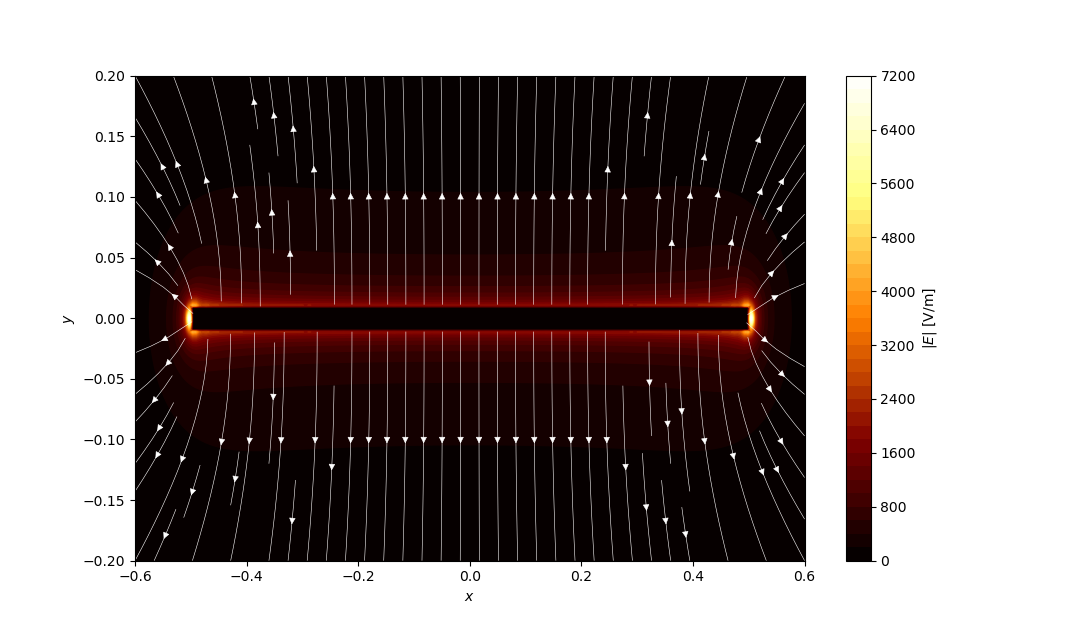

In [26]:
region = region_conductor(X,Y)
Ei, Ej = Efield2D(X,Y,Q)

Ei = Ei * region 
Ej = Ej * region 

Emod = np.sqrt(Ei**2 + Ej**2)

# py.figure(figsize = (12,7))
# py.figure(figsize = (9,5.25))
py.figure(figsize = (10.8,6.3))
my_contourf(X,Y,Emod,r'$|E|$ [V/m]','afmhot')
py.streamplot(X,Y,Ei,Ej,color = 'w',density = 1.2, linewidth = 0.4)

Carga total sobre la superficie del cilindro:

In [13]:
np.sum(q)

1.3200403675967931e-09

## 2. <a id='toc2_'></a>[Placa conductora](#toc0_)

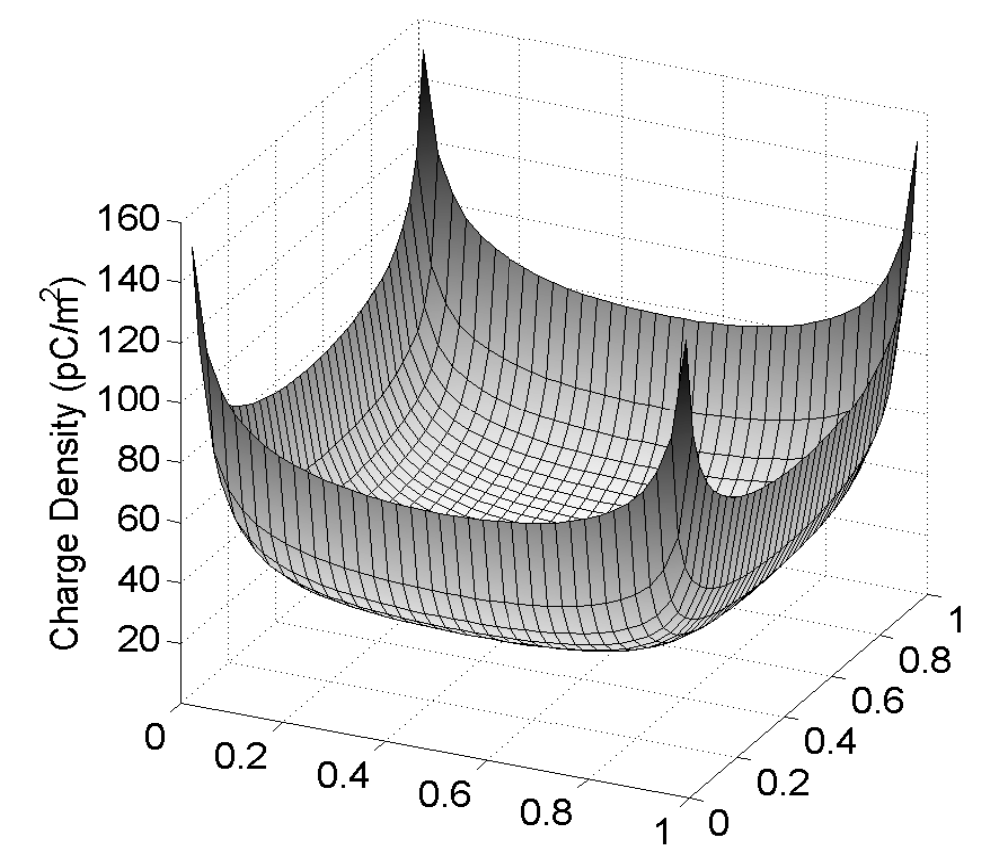

In [ ]:
def Zmn(row, m, n, a, delta):
    if m == n:
        out = 2*a



    xm = delta/2 + (m-1) * delta  # El centro del segmento.
    xa = (row - 1) * delta
    xb = row * delta
    num = np.sqrt(a * a + (xa - xm) * (xa - xm)) - (xa - xm)
    den = np.sqrt(a * a + (xb - xm) * (xb - xm)) - (xb - xm)
    
    return np.log(num/den)

In [3]:
for a in np.arange(3):
    f = lambda y, x: x*(y+a)**2
    print(integrate.dblquad(f, 0, 2, 0, 1))

(0.6666666666666667, 7.401486830834377e-15)
(4.666666666666667, 5.181040781584064e-14)
(12.666666666666668, 1.4062824978585317e-13)


In [ ]:
b = np.array([0,1,2])
f = lambda y, x, b: x*(y+b)**2
print(integrate.dblquad(f, 0, 2, 0, 1))

TypeError: only length-1 arrays can be converted to Python scalars

## 3. <a id='toc3_'></a>[Referencias](#toc0_)

<a id='sadiku'>[1]</a> Sadiku, M.N.O. (2018). $\emph{Computational Electromagnetics with MATLAB}$, (4ta ed.). CRC Press. https://doi.org/10.1201/9781315151250  
<a id='gibson'>[2]</a> Gibson, W.C. (2021). $\emph{The Method of Moments in Electromagnetics}$, (3ra ed.). Chapman and Hall/CRC. https://doi.org/10.1201/9780429355509  
<a id='dworsky'>[2]</a> Dworsky, L. N. (2014). $\emph{Introduction to Numerical Electrostatics Using MATLAB}$. Wiley. https://doi.org/10.1002/9781118758571


<!-- pp. 123-157 -->
